In [23]:
import os
import re
import string
import nltk
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

data_path = r"C:\Users\UserName\Desktop\data\enron1\300notclean"   #Changing the file path to read files
os.chdir(data_path)
 
def read_content(mail_path):   #Taking the opened file (which we will read) info into the file descriptor
    fd = open(mail_path,'rt',newline='', encoding="cp437", errors='ignore')
    #print(text.read())
    #text_file.close()
    return fd

stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
raw_words = [] 

#####---------------------------cleaning txt datas and recreating as cleaned version-----------------------#####
##------------------------------------------------------------------------------------------------------------##

for file in os.listdir():   #loop for scrolling through the list of files 
    if file.endswith(".txt"):
        mail_path = f"{data_path}\{file}"   #Keeping the filename suitable for the criteria in the variable 
        
        text_file = read_content(mail_path)   #Get the raw content from the file descriptor obtained with the function
        raw_mail = text_file.read()
        
        #Division into words
        raw_words += nltk.word_tokenize(raw_mail)   #--word tokenize task
        wordList = [word for word in raw_words if word not in stopwords]   #--cleaning stopwords task
        wordList = [word.lower() for word in wordList]  # Car - car 

        #lemmatization stage--- more safe rasult and some miss like ==> better -> good
        lm = WordNetLemmatizer()
        wordList = [lm.lemmatize(word,"v") for word in wordList]    

        #--------------------------------------
        words = set(nltk.corpus.words.words())
        wordList = [w for w in wordList if w.lower() in words]
      
        # remove 1-length strings
        index = 0 
        for element in wordList : 
            if len(element) == 1:
                del wordList[index]
            index = index + 1
        
        ### WORD CLEANING ###  85people
        def word_cleaning(kelime):
            new_word = ''
            for char in kelime:
                    for item in string.ascii_lowercase:
                        if(char==item):
                            new_word += char
            return new_word

        cleanList = []
        for kelime in wordList:
            if(kelime.isalpha()==1):
                cleanList.append(kelime)
            elif(kelime.isalpha()==0):
                yeni_kelime = word_cleaning(kelime)
                if(yeni_kelime != ''):
                    cleanList.append(yeni_kelime)
        ### WORD CLEANING ###
        
        # remove 1-length strings
        index = 0 
        for element in cleanList : 
            if len(element) == 1:
                del cleanList[index]
            index = index + 1
        
        
        out_data_path = r"C:\Users\UserName\Desktop\data\enron1\300notclean_result"
        new_mail_path = f"{out_data_path}\{file}"
        fd_w = open(new_mail_path, "w")
        fd_w.write(str(cleanList))
        fd_w.close()
        cleanList.clear()
        raw_words.clear()
    

In [32]:
# separate files to CSV
def createCsvFromFiles(dataPath):
    with open(r'C:\Users\UserName\Desktop\data\enron1\csv_here\200Emails.csv',
              'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Text", "Label"]) 
        for filename in os.listdir(dataPath):    
            with open(os.path.join(dataPath, filename), errors='ignore') as f:  
                raw_mail = f.read().replace('\n',"")
                if filename.endswith("spam.txt"):
                    writer.writerow([raw_mail,"spam"])
                elif filename.endswith("ham.txt"):
                    writer.writerow([raw_mail,"ham"])


data_path = r'C:\Users\UserName\Desktop\data\enron1\csv_here\5000mail.csv'   #Changing the file path to read files

fd = open(data_path,'rt',newline='', encoding="cp437", errors='ignore')
emailDataframe = pd.read_csv(fd)     # read csv data into a pandas dataframe
test_data=emailDataframe
#emailList = emailDataframe.values.tolist()  # translate pandas dataframe into a list 

email_data=emailDataframe.copy()                          
print(emailDataframe)
email_data['Label']=emailDataframe['Label']
print(type(emailDataframe))
print()
email_data['Label']=email_data['Label'].map({'ham':0, 'spam':1})    
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
raw_words = [] 

label_enc = preprocessing.LabelEncoder()
email_data['Label'] = label_enc.fit_transform(email_data['Label'])


                                                   Text Label
0                 Subject: christmas tree farm pictures   ham
1     Subject: vastar resources , inc .gary , produc...   ham
2     Subject: calpine daily gas nomination- calpine...   ham
3     Subject: re : issuefyi - see note below - alre...   ham
4     Subject: meter 7268 nov allocationfyi .- - - -...   ham
...                                                 ...   ...
5167  Subject: re : contracts and creditthanks - - i...   ham
5168  Subject: re : tenaska ivok , since we don ' t ...   ham
5169  Subject: hot jobsglobal marketing specialties ...  spam
5170  Subject: save up to 89 % on ink + no shipping ...  spam
5171  Subject: re : tenaska ivi tried calling you th...   ham

[5172 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>



In [33]:

X=email_data['Text']
Y=email_data['Label']

cv=CountVectorizer()
X=cv.fit_transform(X)
#Y=cv.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

mnb = MultinomialNB()  #--------------------------MultinomialNB
mnb.fit(X_train,y_train)
mnb.score(X_test,y_test)
resultMnb = mnb.predict(X_test)

svc = LinearSVC()  #--------------------------LinearSVC
svc.fit(X_train,y_train)
svc.score(X_test,y_test)
resultSvc= svc.predict(X_test)

LR = LogisticRegression(solver='liblinear', penalty='l1')
LR.fit(X_train, y_train)
resultLR = LR.predict(X_test)

#vvvvvvvvvvvvvvvvvvvvvvvvvvvvvResultsvvvvvvvvvvvvvvvvvvvvvvvvvvvvv

def results(result, y_test):
    conf_matrix = confusion_matrix(y_test,result)  
    tn, fp, fn, tp = confusion_matrix(y_test,result).ravel()
    print(conf_matrix)
    print()
    print("tn:",tn,"fp:", fp,"fn:", fn,"tp:", tp)
    print()
    accuracy = accuracy_score(y_test, result) * 100  
    print("Accuracy:",accuracy)
    precision=(tp/(fp+tp))*100
    print("Precision:",precision)
    recall=(tp/(tp+fn))*100
    print("Recall:",recall)
    f1_score=(2/((1/recall)+(1/precision))) 
    print("F1-score:",f1_score)
    
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^Results^^^^^^^^^^^^^^^^^^^^^^^^^^


results(resultMnb,y_test)

print("**************************************************************\n")
results(resultSvc,y_test)
print("**************************************************************\n")
results(resultLR,y_test)



C:\Users\mertyuksel\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[[741   9]
 [ 10 275]]

tn: 741 fp: 9 fn: 10 tp: 275

Accuracy: 98.16425120772946
Precision: 96.83098591549296
Recall: 96.49122807017544
F1-score: 96.66080843585237
**************************************************************

[[727  23]
 [ 11 274]]

tn: 727 fp: 23 fn: 11 tp: 274

Accuracy: 96.71497584541063
Precision: 92.25589225589226
Recall: 96.14035087719299
F1-score: 94.15807560137458
**************************************************************

[[725  25]
 [  9 276]]

tn: 725 fp: 25 fn: 9 tp: 276

Accuracy: 96.71497584541063
Precision: 91.69435215946844
Recall: 96.84210526315789
F1-score: 94.19795221843003


In [27]:
#------------------------ Tek mail test -------------------------------
msg="Subject: having problems in bed ? we can help ! cialis allows men to enjoy a fully normal sex life without having to plan the sexual act . if we let things terrify us , life will not be worth living . brevity is the soul of lingerie . suspicion always haunts the guilty mind"
data=[msg]
vect=cv.transform(data).toarray()
mnb_prediction = mnb.predict(vect)
svc_prediction = svc.predict(vect)

print(" mnb:" ,mnb_prediction[0],"\n","svc:",svc_prediction[0])
#---------------------------------Tek Mail Test---------------------------------------

 mnb: 1 
 svc: 1


In [28]:
import pickle

pickle.dump(mnb, open(r'C:\Users\UserName\multinominal.pkl','wb'))
pickle.dump(svc, open(r'C:\Users\UserName\svc.pkl','wb'))
pickle.dump(LR, open(r'C:\Users\UserName\logisticRegression.pkl','wb'))
pickle.dump(cv,open(r'C:\Users\UserName\vectorizer.pkl','wb'))


[[1973   14]
 [  40 1473]]

tn: 1973 fp: 14 fn: 40 tp: 1473

Accuracy: 98.45714285714286
Precision: 99.05850706119705
Recall: 97.35624586913417
F1-score: 98.20000000000002
[[1973   14]
 [  40 1473]]

tn: 1973 fp: 14 fn: 40 tp: 1473

Accuracy: 98.45714285714286
Precision: 99.05850706119705
Recall: 97.35624586913417
F1-score: 98.20000000000002
[[1953   34]
 [  41 1472]]

tn: 1953 fp: 34 fn: 41 tp: 1472

Accuracy: 97.85714285714285
Precision: 97.74236387782204
Recall: 97.29015201586253
F1-score: 97.51573368665122
[[1958   29]
 [  25 1488]]

tn: 1958 fp: 29 fn: 25 tp: 1488

Accuracy: 98.45714285714286
Precision: 98.0883322346737
Recall: 97.35624586913417
F1-score: 98.21782178217822


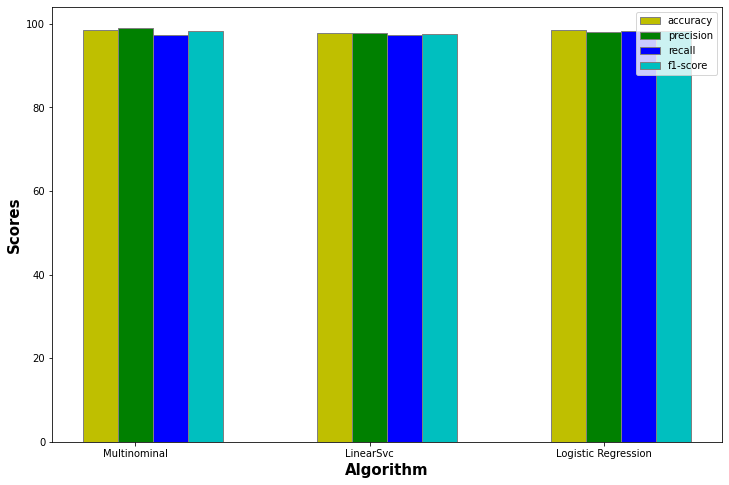

In [29]:
# GRAPH 

conf_matrix = confusion_matrix(y_test,resultMnb)  
tn, fp, fn, tp = confusion_matrix(y_test,resultMnb).ravel()
print(conf_matrix)
print()
print("tn:",tn,"fp:", fp,"fn:", fn,"tp:", tp)
print()
accuracy = accuracy_score(y_test, resultMnb) * 100  
print("Accuracy:",accuracy)
precision=(tp/(fp+tp))*100 
print("Precision:",precision)
recall=(tp/(tp+fn))*100
print("Recall:",recall)
f1_score=(2/((1/recall)+(1/precision))) 
print("F1-score:",f1_score)

conf_matrix = confusion_matrix(y_test,resultMnb)  
tn, fp, fn, tp = confusion_matrix(y_test,resultMnb).ravel()
print(conf_matrix)
print()
print("tn:",tn,"fp:", fp,"fn:", fn,"tp:", tp)
print()
accuracy = accuracy_score(y_test, resultMnb) * 100  
print("Accuracy:",accuracy)
precision=(tp/(fp+tp))*100 
print("Precision:",precision)
recall=(tp/(tp+fn))*100
print("Recall:",recall)
f1_score=(2/((1/recall)+(1/precision))) 
print("F1-score:",f1_score)

conf_matrix = confusion_matrix(y_test,resultSvc)  
tn, fp, fn, tp = confusion_matrix(y_test,resultSvc).ravel()
print(conf_matrix)
print()
print("tn:",tn,"fp:", fp,"fn:", fn,"tp:", tp)
print()
accuracySvc = accuracy_score(y_test, resultSvc) * 100 
print("Accuracy:",accuracySvc)
precisionSvc=(tp/(fp+tp))*100 
print("Precision:",precisionSvc)
recallSvc=(tp/(tp+fn))*100
print("Recall:",recallSvc)
f1_scoreSvc=(2/((1/recallSvc)+(1/precisionSvc))) 
print("F1-score:",f1_scoreSvc)

conf_matrix = confusion_matrix(y_test,resultLR)  
tn, fp, fn, tp = confusion_matrix(y_test,resultLR).ravel()
print(conf_matrix)
print()
print("tn:",tn,"fp:", fp,"fn:", fn,"tp:", tp)
print()
accuracyLR = accuracy_score(y_test, resultLR) * 100  
print("Accuracy:",accuracyLR)
precisionLR=(tp/(fp+tp))*100 
print("Precision:",precisionLR)
recallLR=(tp/(tp+fn))*100
print("Recall:",recall)
f1_scoreLR=(2/((1/recallLR)+(1/precisionLR))) 
print("F1-score:",f1_scoreLR)

import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Ac = [ accuracy,  accuracySvc,accuracyLR]
Pr = [ precision,  precisionSvc,precisionLR]
Re = [ recall,  recallSvc,recallLR]
F1 = [ f1_score,  f1_scoreSvc,f1_scoreLR]

# Set position of bar on X axis
br1 = np.arange(len(Ac))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, Ac, color ='y', width = barWidth,
        edgecolor ='grey', label ='accuracy')
plt.bar(br2, Pr, color ='g', width = barWidth,
        edgecolor ='grey', label ='precision')
plt.bar(br3, Re, color ='b', width = barWidth,
        edgecolor ='grey', label ='recall')
plt.bar(br4, F1, color ='c', width = barWidth,
        edgecolor ='grey', label ='f1-score')
 
# Adding Xticks
plt.xlabel('Algorithm', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Ac))],
        [ 'Multinominal', 'LinearSvc','Logistic Regression'])
 
plt.legend()
plt.show()